In [13]:
import os
import pickle
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

#  

## User classification 

In [3]:
fuser = "/Users/akusok/Dropbox/research-signatures/results-users/res{:d}.txt"

In [4]:
with open(fuser.format(1), "r") as f:
    lines = [line.rstrip('\n') for line in f if line.startswith('top')]
    topk = [float(line.split(' ')[-1]) for line in lines]

topk

[0.84, 1.0, 1.0, 1.0]

In [5]:
data = []

for i in range(25):
    with open(fuser.format(i+1), "r") as f:
        lines = [line.rstrip('\n') for line in f if line.startswith('top')]
        topk = [float(line.split(' ')[-1]) for line in lines]
    data.append(topk)

In [6]:
pd.DataFrame(data).mean(0)

0    0.9120
1    0.9968
2    1.0000
3    1.0000
dtype: float64

#  

## Fake recognition 

In [15]:
ffake = "/Users/akusok/Dropbox/research-signatures/results-fakes-supervised/res{}.txt"

In [16]:
data = []

for i in range(28):
    with open(ffake.format(i+1), "r") as f:
        header = True
        lines = []

        for line in f:
            if line.startswith('uid'):
                header = False
            if header:
                continue

            if line.startswith('accuracy'):
                break

            lines.append(line.rstrip('\n'))

        lines = lines[1:]
        d0 = [[float(l) for l in line.split(' ') if len(l)>0] for line in lines]
        d1 = pd.DataFrame(d0)
        data.append(d1)
        
X = pd.concat(data, axis=0)

In [17]:
X

,0,1,2
0,67.0,1.0,0.588679
1,73.0,1.0,0.558829
2,81.0,1.0,0.617700
3,96.0,0.0,0.362544
4,115.0,0.0,0.375823
...,...,...,...
20,49.0,0.0,0.342145
21,50.0,1.0,0.503733
22,62.0,1.0,0.687154
23,78.0,0.0,0.482340


In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(X[1]>0.5, X[2]>0.5)

0.7414285714285714

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

In [21]:
fpr, tpr, thresholds = roc_curve(X[1], X[2])

#### EER

In [22]:
fpr, tpr, threshold = roc_curve(X[1], X[2], pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
EER

0.25885558583106266

## 

In [23]:
auc = roc_auc_score(X[1], X[2])

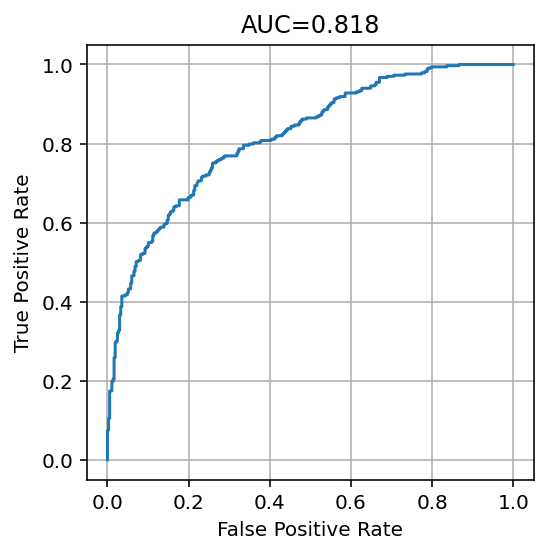

In [24]:
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr)
plt.grid('minor')
plt.title("AUC={:.3f}".format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig("binary-roc.pdf", bbox_inches='tight')
plt.show()

#  

## Fake recognition UNSUPERVISED

In [25]:
ffake = "/Users/akusok/Dropbox/research-signatures/results-fakes-unsupervised/res{}.txt"

In [26]:
data = []

for i in range(99):
    with open(ffake.format(i+1), "r") as f:
        header = True
        lines = []

        for line in f:
            if line.startswith('uid'):
                header = False
            if header:
                continue

            if line.startswith('accuracy'):
                break

            lines.append(line.rstrip('\n'))

        lines = lines[1:]
        d0 = [[float(l) for l in line.split(' ') if len(l)>0] for line in lines]
        d1 = pd.DataFrame(d0)
        data.append(d1)
        
X = pd.concat(data, axis=0)

In [27]:
accuracy_score(X[1]>0.5, X[2]>0.5)

0.6703030303030303

In [28]:
fprU, tprU, thresholds = roc_curve(X[1], X[2])

In [29]:
aucU = roc_auc_score(X[1], X[2])

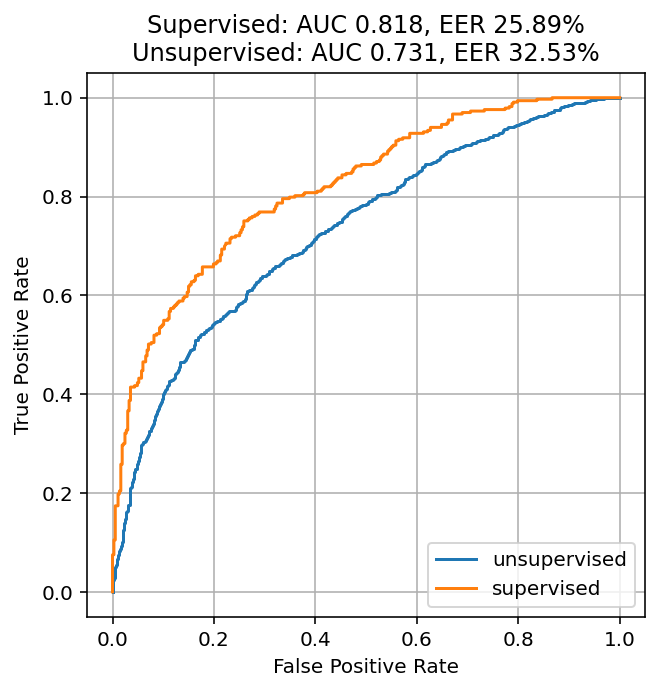

In [34]:
plt.figure(figsize=(5,5))
plt.plot(fprU, tprU, label="unsupervised")
plt.plot(fpr, tpr, label="supervised")
plt.grid('minor')
plt.title("Supervised: AUC {:.3f}, EER 25.89%\nUnsupervised: AUC {:.3f}, EER 32.53%".format(auc, aucU))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig("binary-roc.pdf", bbox_inches='tight')
plt.legend(loc=4)
plt.savefig("sig_roc.pdf", bbox_inches='tight', pad_inches=0)
plt.show()